In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)
#pd.set_option('display.width', 1000)

In [106]:
df = pd.read_csv("train.csv",index_col=0)

In [107]:
cat = ["product_code","attribute_0","attribute_1"]
[k for k  in df[cat].columns]

['product_code', 'attribute_0', 'attribute_1']

In [108]:
cat = ["product_code","attribute_0","attribute_1"]
non_cat = [k for k in df if k not in cat]
df_non_cat = df[non_cat]
df_non_cat

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,,
0,80.10,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,84.89,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,82.43,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,101.07,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,188.06,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,158.95,6,9,6,16,4,16.301,13.259,18.068,15.505,10.865,19.354,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,146.02,6,9,10,12,8,17.543,NaN,17.984,19.078,11.139,19.563,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,115.62,6,9,1,10,1,15.670,11.535,16.778,18.385,11.630,19.279,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0


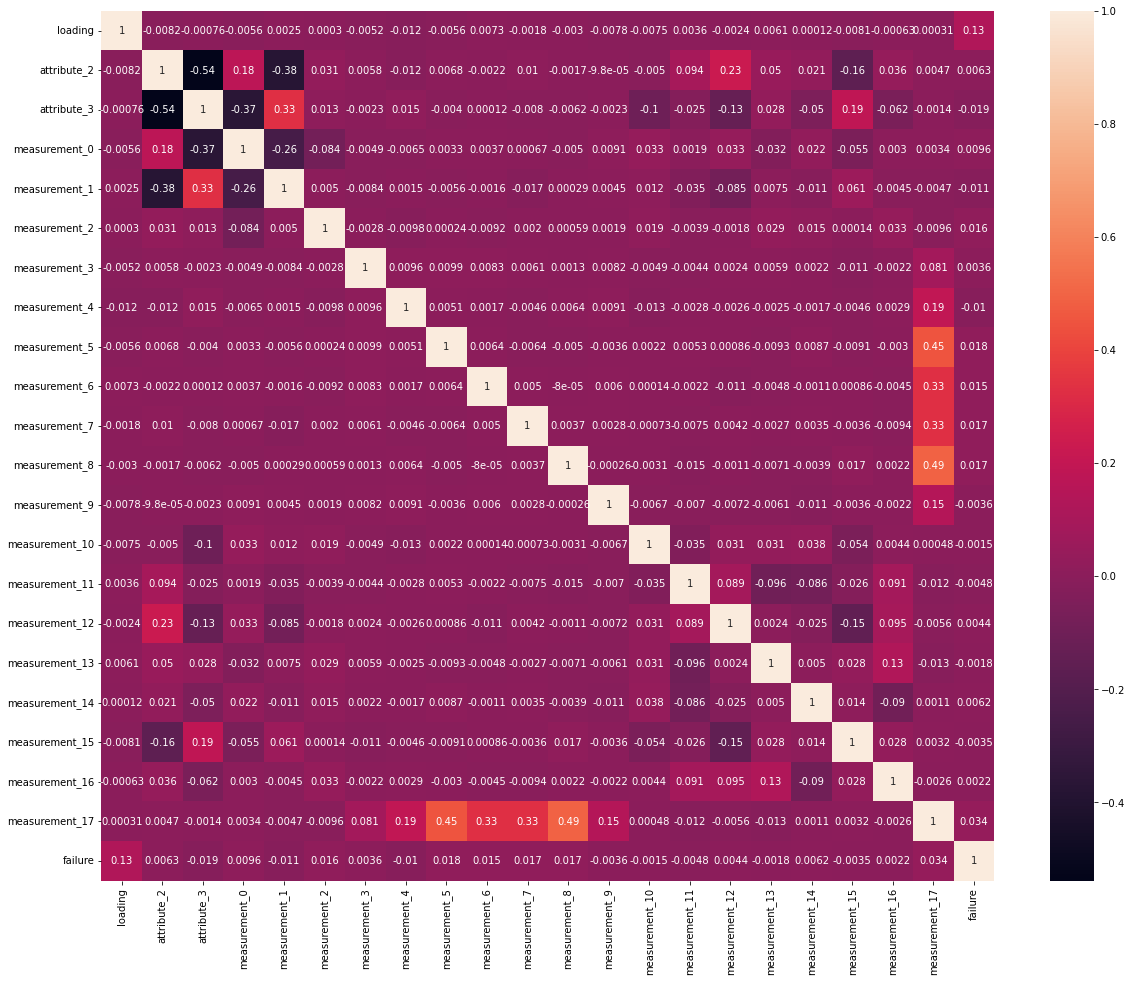

In [43]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [60]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
df_non_cat = imputer.fit_transform(df_non_cat)

In [61]:
df_non_cat

array([[ 80.1  ,   9.   ,   5.   , ...,  14.684, 764.1  ,   0.   ],
       [ 84.89 ,   9.   ,   5.   , ...,  15.631, 682.057,   0.   ],
       [ 82.43 ,   9.   ,   5.   , ...,  17.946, 663.376,   0.   ],
       ...,
       [115.62 ,   6.   ,   9.   , ...,  14.065, 750.364,   0.   ],
       [106.38 ,   6.   ,   9.   , ...,  12.865, 730.156,   0.   ],
       [131.2  ,   6.   ,   9.   , ...,  17.89 , 602.354,   0.   ]])

Eigenvalues:
[2.19822918 1.87743023 1.26515723 1.16819251 1.13391565 1.09492686
 1.02163377 1.01592709 1.01058391 1.00399217 0.99614482 0.98541937
 0.98181485 0.94940133 0.91243082 0.86861073 0.80849091 0.79931048
 0.72486288 0.66562112 0.38592742 0.13280471]

Variances (Percentage):
[9.99157477 8.53345259 5.75049825 5.30976612 5.15396806 4.97675295
 4.64361507 4.61767663 4.59339032 4.563429   4.52776058 4.47901039
 4.46262682 4.31529816 4.14725672 3.94808201 3.67482038 3.6330927
 3.29470727 3.02543666 1.75414952 0.60363506]



Text(0, 0.5, 'Explained variance (%)')

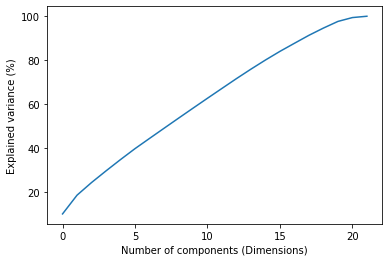

In [62]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(df_non_cat)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [78]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, learning_rate='auto',
                 init='random', perplexity=3)
X_TSNE = tsne.fit_transform(X_scaled)

In [79]:
X_TSNE

array([[-50.915207 , -10.416966 , -16.330233 ],
       [-37.071053 ,   9.658347 , -12.497687 ],
       [-31.530333 ,   1.9622699,  16.974855 ],
       ...,
       [ 45.786354 ,  -4.6932354,  -3.5314415],
       [ 37.931038 ,  -3.3524172,   1.4788066],
       [ 20.03451  , -39.510265 ,   7.3223352]], dtype=float32)

<AxesSubplot:>

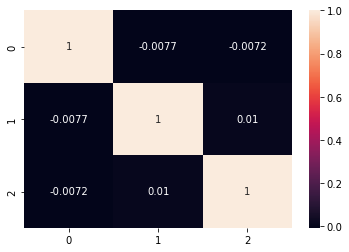

In [112]:
sns.heatmap(pd.DataFrame(X_TSNE).corr(),annot=True)

In [113]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

<AxesSubplot:>

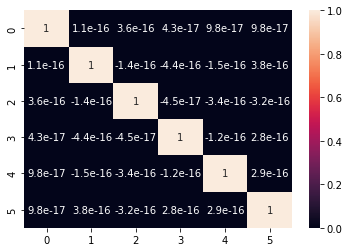

In [114]:
sns.heatmap(pd.DataFrame(X_pca).corr(),annot=True)

In [115]:
y = df["failure"]

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_TSNE,y,test_size=0.3, random_state=42)

In [119]:
X_TSNE.shape

(26570, 3)

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, GridSearchCV

p_grid ={}

log = LogisticRegression()
cv_results = GridSearchCV(log,param_grid=p_grid, cv=4)
nested_scores = cross_val_score(estimator = cv_results,X =X_TSNE,y=y,cv=4)

#model = log.fit(X_train,y_train)
#model.score(X_test,y_test)
#y_log_prob = model.predict_proba(X_test)
#y_log = model.predict(X_test)
nested_scores


log = LogisticRegression()
model = log.fit(X_TSNE,y)
y_log_prob = model.predict_proba(X_test)
y_log = model.predict(X_test)
y_log_prob

array([[1.00000000e+00, 1.16088689e-10],
       [9.99871616e-01, 1.28384219e-04],
       [9.99996652e-01, 3.34839294e-06],
       ...,
       [2.16155258e-02, 9.78384474e-01],
       [9.18896108e-01, 8.11038921e-02],
       [9.99973543e-01, 2.64574302e-05]])

In [186]:
y_log_prob[:, 1]+y_log_prob[:, 0]

array([1., 1., 1., ..., 1., 1., 1.])

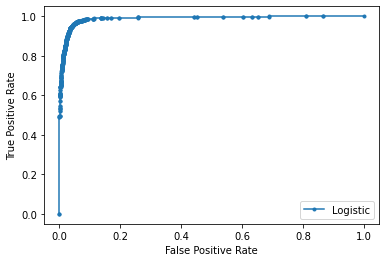

In [171]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
y_log_prob[:, 1]
roc_auc_score(y_test,y_log_prob[:, 1])

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_log_prob[:, 1])
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB

p_grid ={}

GB = GaussianNB()
cv_results = GridSearchCV(GB,param_grid=p_grid, cv=4)
nested_scores = cross_val_score(estimator = cv_results,X =X_TSNE,y=y,cv=4)

#model = log.fit(X_train,y_train)
#model.score(X_test,y_test)
#y_log_prob = model.predict_proba(X_test)
#y_log = model.predict(X_test)
nested_scores

model_GB = GB.fit(X_TSNE,y)
model_GB.score(X_TSNE,y)
y_GB_prob = model_GB.predict_proba(X_test)
y_GB_prob
y_GB = model_GB.predict(X_test)

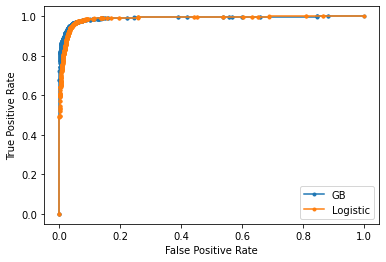

In [174]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
y_GB_prob[:, 1]
roc_auc_score(y_test,y_GB_prob[:, 1])

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_GB_prob[:, 1])
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='GB')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot



y_log_prob[:, 1]
roc_auc_score(y_test,y_log_prob[:, 1])

# calculate roc curves
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_log_prob[:, 1])
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [176]:
roc_auc_score(y_test,y_log_prob[:, 1])

0.9881424210199772

In [178]:
y_hat

array([0, 0, 0, ..., 1, 0, 0])


Test confusion_matrix


Text(33.0, 0.5, 'True')

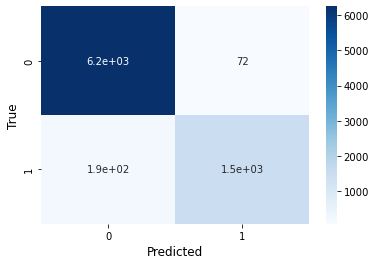

In [184]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_GB)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [88]:
df_test = pd.read_csv("test.csv")
cat = ["product_code","attribute_0","attribute_1"]
non_cat = [k for k in df_test if k not in cat]
df_test_non_cat = df_test[non_cat]
df_test_non_cat = imputer.fit_transform(df_test_non_cat)
df_test_non_cat = sc.fit_transform(df_test_non_cat)
df_test_non_cat = tsne.fit_transform(df_test_non_cat)

In [129]:
y_tst_hat = (model.predict_proba(df_test_non_cat)+model_GB.predict_proba(df_test_non_cat))/2

In [131]:
y_tst_hat

array([[2.26117967e-02, 9.77388203e-01],
       [9.78810043e-01, 2.11899571e-02],
       [1.54749031e-02, 9.84525097e-01],
       ...,
       [9.99984022e-01, 1.59783969e-05],
       [9.98389287e-01, 1.61071300e-03],
       [2.86801822e-01, 7.13198178e-01]])

In [132]:
pd.DataFrame(y_tst_hat).to_csv("tsne_GB_Log.csv")

In [99]:
# 其他
# 去除共線性
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer


from statsmodels.stats.outliers_influence import variance_inflation_factor

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh

        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = SimpleImputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            # Loop repeatedly until we find that all columns within our dataset have a VIF value we're happy with.
            variables = X.columns
            dropped=False
            vif = []
            new_vif = 0
            for var in X.columns:
                new_vif = variance_inflation_factor(X[variables].values, X.columns.get_loc(var))
                vif.append(new_vif)
                if np.isinf(new_vif):
                    break
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                #print 'Dropping {X.columns[{0}]} with vif={{1}}'.format(maxloc, max_vif)
                print (X.columns[maxloc])
                print (max_vif)
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X
transformer = ReduceVIF()
#X = data_all
# Only use 10 columns for speed in this example
data_all = transformer.fit_transform(df[non_cat].drop("failure",axis=1), y)

data_all.head()

ReduceVIF fit
ReduceVIF transform
measurement_8
375.31850369426155
measurement_5
311.3235422903612
measurement_6
295.06759111131316
measurement_3
265.53372975243053
measurement_13
182.26792348835724
measurement_11
152.10741669872317
measurement_7
139.4170933728863
measurement_4
128.54695031529386
measurement_9
120.27507300321666
measurement_10
111.48921756848306
measurement_14
94.47059649980451
measurement_16
83.1325392430873
measurement_15
71.65698269258868
measurement_12
53.45011633105855
measurement_17
29.23856457895689
attribute_3
16.06256597563073
attribute_2
11.929277811221954
loading
6.831631008400773


,measurement_0,measurement_1,measurement_2
0,7.0,8.0,4.0
1,14.0,3.0,3.0
2,12.0,1.0,5.0
3,13.0,2.0,6.0
4,9.0,2.0,8.0
